In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from DeepPurpose import utils, models, dataset
from DeepPurpose.utils import *

In [ ]:
import numpy as np
import pandas as pd
import json
import os 
print(os.path.abspath('.'))

In [4]:
Smile = np.load("DB_smiles_binary.npy", allow_pickle=True)
Target = np.load("DB_targets_binary.npy", allow_pickle=True)
y = np.load("DB_y_binary.npy", allow_pickle=True)
print('Done!')

Done!


In [5]:
X_drugs, X_targets, y = Smile, Target, y
print('Drug 1: ' + X_drugs[0])
print('Target 1: ' + X_targets[0])
print('Score 1: ' + str(y[0]))

Drug 1: Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1
Target 1: MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK
Score 1: 1


In [6]:
y.shape

(66444,)

In [7]:
drug_encoding, target_encoding = 'CNN', 'AAC'

In [8]:
train, val, test = utils.data_process(X_drugs, X_targets, y, 
                                drug_encoding, target_encoding, 
                                split_method='train_full',frac=[0.8,0.1,0.1],
                                random_seed = 1)
train.head(1)

Drug Target Interaction Prediction Mode...
in total: 66444 drug-target pairs
encoding drug...
unique drugs: 10665
encoding protein...
unique target sequence: 1413
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
Done.


,SMILES,Target Sequence,Label,drug_encoding,target_encoding
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,1,"[C, c, 1, c, c, c, (, C, N, S, (, =, O, ), (, ...","[5.0, 2.692, 3.846, 7.308, 0.385, 5.0, 4.231, ..."


In [9]:
# use pre-trained model
model = models.model_pretrained(path_dir = './')
model.config

{'input_dim_drug': 1024,
 'input_dim_protein': 8420,
 'hidden_dim_drug': 128,
 'hidden_dim_protein': 256,
 'cls_hidden_dims': [1024, 1024, 512],
 'batch_size': 512,
 'train_epoch': 50,
 'test_every_X_epoch': 10,
 'LR': 0.001,
 'drug_encoding': 'CNN',
 'target_encoding': 'AAC',
 'result_folder': './result/',
 'binary': True,
 'num_workers': 10,
 'cnn_drug_filters': [32, 64, 96],
 'cnn_drug_kernels': [4, 6, 8],
 'mlp_hidden_dims_target': [1024, 256, 64],
 'decay': 0}

In [10]:
'''
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         test_every_X_epoch = 10, 
                         LR = 0.001, 
                         #decay = 0.001,
                         batch_size = 512,
                         hidden_dim_drug = 128,
                         #mpnn_hidden_size = 128,
                         #mpnn_depth = 3, 
                         cnn_drug_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8], 
                         #cnn_target_filters = [32,64,96],
                         #cnn_target_kernels = [4,8,12],
                         #transformer_n_layer_target = 2,
                         num_workers = 10
                              )
'''

'\nconfig = utils.generate_config(drug_encoding = drug_encoding, \n                         target_encoding = target_encoding, \n                         cls_hidden_dims = [1024,1024,512], \n                         train_epoch = 100, \n                         test_every_X_epoch = 10, \n                         LR = 0.001, \n                         #decay = 0.001,\n                         batch_size = 512,\n                         hidden_dim_drug = 128,\n                         #mpnn_hidden_size = 128,\n                         #mpnn_depth = 3, \n                         cnn_drug_filters = [32,64,96],\n                         cnn_drug_kernels = [4,6,8], \n                         #cnn_target_filters = [32,64,96],\n                         #cnn_target_kernels = [4,8,12],\n                         #transformer_n_layer_target = 2,\n                         num_workers = 10\n                              )\n'

In [11]:
#model = models.model_initialize(**config)

In [12]:
#model.config['train_epoch'] = 50
#model.config['batch_size'] = 1024

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.05474. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.06138. Total time 0.0025 hours
Validation at Epoch 1 , AUROC: 0.99260 , AUPRC: 0.94834 , F1: 0.83919
Training at Epoch 2 iteration 0 with loss 0.05149. Total time 0.00388 hours
Training at Epoch 2 iteration 100 with loss 0.05794. Total time 0.00611 hours
Validation at Epoch 2 , AUROC: 0.99351 , AUPRC: 0.95111 , F1: 0.84289
Training at Epoch 3 iteration 0 with loss 0.08662. Total time 0.00777 hours
Training at Epoch 3 iteration 100 with loss 0.06303. Total time 0.01 hours
Validation at Epoch 3 , AUROC: 0.99264 , AUPRC: 0.94636 , F1: 0.83924
Training at Epoch 4 iteration 0 with loss 0.06162. Total time 0.01138 hours
Training at Epoch 4 iteration 100 with loss 0.06292. Total time 0.01388 hours
Validation at Epoch 4 , AUROC: 0.99315 , AUPRC: 0.94975 , F1: 0.84539
Training at Epoch 5 iteration 0 with loss 

Training at Epoch 37 iteration 0 with loss 0.06132. Total time 0.13638 hours
Training at Epoch 37 iteration 100 with loss 0.05638. Total time 0.13861 hours
Validation at Epoch 37 , AUROC: 0.99431 , AUPRC: 0.95779 , F1: 0.85808
Training at Epoch 38 iteration 0 with loss 0.06871. Total time 0.14 hours
Training at Epoch 38 iteration 100 with loss 0.11010. Total time 0.14222 hours
Validation at Epoch 38 , AUROC: 0.99264 , AUPRC: 0.94849 , F1: 0.83009
Training at Epoch 39 iteration 0 with loss 0.06354. Total time 0.14388 hours
Training at Epoch 39 iteration 100 with loss 0.06130. Total time 0.14583 hours
Validation at Epoch 39 , AUROC: 0.99376 , AUPRC: 0.95427 , F1: 0.84462
Training at Epoch 40 iteration 0 with loss 0.04717. Total time 0.1475 hours
Training at Epoch 40 iteration 100 with loss 0.07078. Total time 0.14972 hours
Validation at Epoch 40 , AUROC: 0.99390 , AUPRC: 0.95487 , F1: 0.84551
Training at Epoch 41 iteration 0 with loss 0.07023. Total time 0.15111 hours
Training at Epoch 4

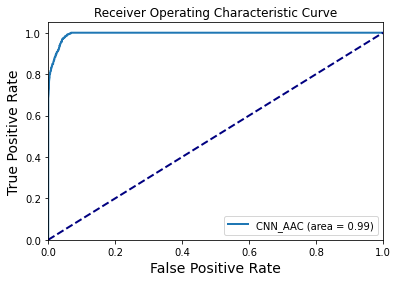

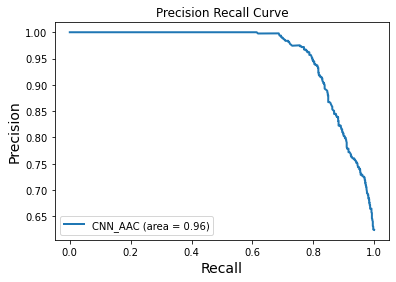

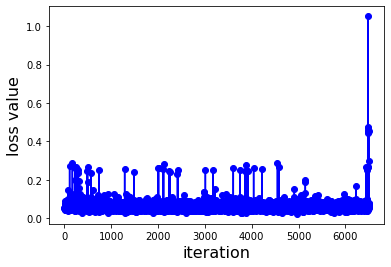

In [10]:
model.train(train, val, test)

In [11]:
model.save_model('./model_CNN_AAC_DB_CAL')